### Sequential API, Functional API

#### Sequential API (단순한것)
- 간단한 모델을 구현하기에 적합하고 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단한다.
- 단일 입력 및 출력만 있으므로 레이어를 공유하거나 여러 입력 또는 출력을 가질 수 있는 모델을 생성할 수 없다.
<sub>Sequential은 대괄호로 열어야 하며, 제어문이 사용이 불가하다.</sub>

#### Functional API (복잡한것, 단 단순한것도 functional로도 사용함)
- Functional API는 Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있다.
- 여러 개의 입력 및 출력을 가진 모델을 구현하거나 층 간의 연결 및 연산을 수행하는 모델 구현 시 사용한다.  
<sub>Functional은 내놓고 사용하며, 제어문 결합이 가능하고 상황에 따라 튜닝이 가능하다.</sub>

#### 성능 평가
<img src="./images/validation.png" width="700" style="margin-left: 0">

##### ○ Performance estimation (사전에 생성된 모델을 사용할 때)
1. Large dataset
    - 큰 데이터 세트에서는 그표준대로 사용
2. Small dataset
    - 작은 데이터 세트는 데이터가 적기 때문에 20%만 가져와서 하기 힘들기 때문에,  
      100개라고 가정할 때 99개는 훈련시키고 1개를 랜덤으로 뽑아와서 검증으로 사용
    - 작은 데이터 세트에서는 반복해서 데이터 훈련을 할 수 있도록 하고,  
      0.632(+) bootstrap이라는 이름의 부트스트랩을 사용해서 진행 (더 훈련할 수 있게 반복하는 것)

##### ○ Model selection and performance estimation (하이퍼 파라미터 오티마제이션)
1. Large dataset
    - 하이퍼 파라미터를 최적화할 수 있고 데이터개수가 많다면, (train/validatino/test split) 세가지로 분리
2. Small dataset
    - 작은 데이터 세트는 데이터가 적기 때문에 20%만 가져와서 하기 힘들기 때문에,  
      100개라고 가정할 때 99개는 훈련시키고 1개를 랜덤으로 뽑아와서 검증으로 사용

In [1]:
from tensorflow.keras.datasets import fashion_mnist

# tensorflow 라이브러리에 내장되어 있는 패션 데이터 세트 호출 후 데이터 세트 분리
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

# 형태 확인
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
import numpy as np

# 전처리 함수 선언
def get_preprocessed_data(images, targets):
    # 픽셀 범위를 0 또는 1로 이미지 정규화 후 형변환
    images = np.array(images / 255.0, dtype=np.float32)
    # 타겟 데이터 형변환
    targets = np.array(targets, dtype=np.float32)

    return images, targets

# 함수를 통해 형변환 진행
train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

# 형변환 후 형태 확인
# shape는 변화가 생기면 안됨
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

# 입력 데이터 크기 지정
# Flatten는 층이 아니기 때문에 층에 들어가기 전에 사전 작업
INPUT_SIZE = 28

# Sequential는 list를 사용해야 함

# 전부 Dense layer라고 부른다.
# 학습할 데이터가 많으면 neuron의 개수를 더 많이 지정(예, 64, 128, 256 등)하거나 은닉층 수를 더 늘리면 된다.
# 학습할 데이터가 적으면 neuron의 개수 또는 은닉층 수를 줄이는 것이 좋다.
model = Sequential([
    # 전체 28 * 28(784)개의 feature로 flatten 진행
    # 첫 번째 Input Layer
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    
    # 두 번째 Hidden Layer (은닉, relu 사용)
    # 2의 제곱으로 넣기(64, 128,...) = bias
    Dense(64, activation='relu'),
    
    # 세 번째 Hidden Layer (은닉, relu 사용)
    Dense(128, activation='relu'),
    
    # 마지막 Output Layer (다중 출력, softmax 사용)
    Dense(10, activation='softmax')
])

# 모델 구조 확인
# 파라미터 수 = (입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수
# 이 파라미터 수에는 편향(bias) 파라미터도 포함됨
model.summary()

C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

#### TIP!
상황에 따라 다르지만, 일반적으로  
학습할 데이터가 많을 수록 복잡도가 증가하며, 학습 데이터가 적으면 복잡도가 감소한다(과적합 때문).

학습 데이터가 많다면 뉴런의 개수도 많이 해야하고 층도 높여야 하는데, 시간이 오래걸린다.  
때문에, 데이터를 리샘프하여 데이터 개수를 잘게 나누거나 애초에 데이터 자체를 랜덤하게 뽑아야 한다.
첫 번째 사이클은 기본으로 세팅으로 진행한다.

64, 128.. 등 숫자를 증가하는 이유는 그만큼 학습하라는 의미도 있지만,  
자극을 조금만 줘도 넘어갈 수 있게 하기 위함이다.

In [4]:
from tensorflow.keras.utils import to_categorical

# 타겟을 원-핫 인코딩을 통해 변환
train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

# (원-핫 인코딩으로 변환한)10개 피처에 60000개 행

(60000, 10) (10000, 10)


In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# 모델 컴파일 = 모델을 사용할 수 있도록 준비
# optimizer= 최적화 알고리즘, Adam(0.001) = 기본 학습률은 0.001으로 생략이 가능함
# loss = 손실함수, 크로스 엔트로피 사용
# metrics = 성능 측정 지표선택, 정확도 사용
model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [6]:
# 훈련 결과 history에 저장
# batch_size는 2의 제곱, epochs로 20번 반복
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7532 - loss: 0.7207
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8583 - loss: 0.3894
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8732 - loss: 0.3468
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8850 - loss: 0.3157
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8866 - loss: 0.3035
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8962 - loss: 0.2818
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8978 - loss: 0.2756
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9018 - loss: 0.2639
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9044 - loss: 0.2545
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9095 - loss: 0.2457
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9100 - loss: 0.2414
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [7]:
# 학습과정 지표 및 손실값 결과 확인
# 정확도랑 loss가 나옴
history.history

{'accuracy': [0.8159000277519226,
  0.8630333542823792,
  0.8732666373252869,
  0.8825166821479797,
  0.8885166645050049,
  0.8938000202178955,
  0.8971499800682068,
  0.9014666676521301,
  0.9042333364486694,
  0.9078333377838135,
  0.9104833602905273,
  0.9123166799545288,
  0.9157500267028809,
  0.9164333343505859,
  0.918749988079071,
  0.9209333062171936,
  0.9230333566665649,
  0.9251166582107544,
  0.926966667175293,
  0.9279500246047974],
 'loss': [0.5268526077270508,
  0.38003212213516235,
  0.3451526463031769,
  0.31766781210899353,
  0.3009803593158722,
  0.2879769206047058,
  0.2753249406814575,
  0.2646736800670624,
  0.25518786907196045,
  0.2465355098247528,
  0.24015803635120392,
  0.23241247236728668,
  0.22554843127727509,
  0.22052685916423798,
  0.21312813460826874,
  0.20795001089572906,
  0.20160146057605743,
  0.19731546938419342,
  0.19007369875907898,
  0.1881961077451706]}

In [8]:
# loss만 확인
print(history.history['loss'])
print('=' * 80)
# 정확도만 확인 
history.history['accuracy']

[0.5268526077270508, 0.38003212213516235, 0.3451526463031769, 0.31766781210899353, 0.3009803593158722, 0.2879769206047058, 0.2753249406814575, 0.2646736800670624, 0.25518786907196045, 0.2465355098247528, 0.24015803635120392, 0.23241247236728668, 0.22554843127727509, 0.22052685916423798, 0.21312813460826874, 0.20795001089572906, 0.20160146057605743, 0.19731546938419342, 0.19007369875907898, 0.1881961077451706]


[0.8159000277519226,
 0.8630333542823792,
 0.8732666373252869,
 0.8825166821479797,
 0.8885166645050049,
 0.8938000202178955,
 0.8971499800682068,
 0.9014666676521301,
 0.9042333364486694,
 0.9078333377838135,
 0.9104833602905273,
 0.9123166799545288,
 0.9157500267028809,
 0.9164333343505859,
 0.918749988079071,
 0.9209333062171936,
 0.9230333566665649,
 0.9251166582107544,
 0.926966667175293,
 0.9279500246047974]

In [9]:
# 3차원으로 변경 후 형태 확인
# expand_dims = 한 차원 높여줌
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [10]:
# 예측
# 모델에 이미지를 전달할 때 정확한 차원을 유지해야 하기 때문에 expand_dims을 사용하여 3차원으로 변경한 뒤 예측
pred_prob = model.predict(np.expand_dims(test_images[10], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[1.1969932e-04 1.8782544e-06 1.3859415e-02 2.8045342e-05 9.6953970e-01
  5.8471374e-12 1.6451141e-02 1.8398627e-08 2.0131001e-08 6.7242505e-09]]


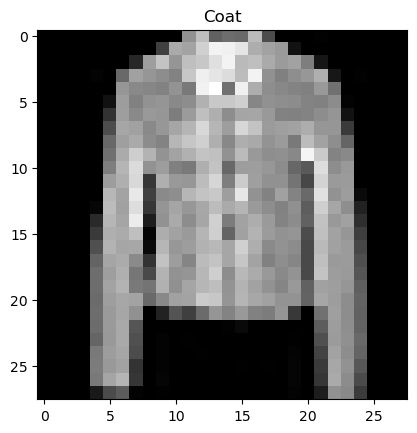

In [11]:
import matplotlib.pyplot as plt

# 클래스 이름 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print(class_names[pred_prob.flatten().argsort()[::-1][0]])

# 이미지 출력
plt.imshow(test_images[10], cmap='gray')
# 이미지의 예측된 이름 출력
# pred_prob 가 고차원이라 Flatten으로 펴고, 내림차순 정렬 0번째 방으로 예측 결과 확인
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [12]:
# 평가
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.3645


[0.3621952533721924, 0.8820000290870667]

### Validation

In [13]:
from tensorflow.keras.datasets import fashion_mnist

# tensorflow 라이브러리에 내장되어 있는 패션 데이터 세트 호출 후 데이터 세트 분리
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

# 형태 확인
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [14]:
import numpy as np

# 전처리 함수 선언
def get_preprocessed_data(images, targets):
    # 픽셀 범위를 0 또는 1로 이미지 정규화 후 형변환
    images = np.array(images / 255.0, dtype=np.float32)
    # 타겟 데이터 형변환
    targets = np.array(targets, dtype=np.float32)

    return images, targets

# 함수를 통해 형변환 진행
train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

# 형변환 후 형태 확인
# shape는 변화가 생기면 안됨
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 세트 분리
# 검증 데이터 생성
train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

# 원-핫 인코딩을 통해 타겟 데이터 변환
train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

# 변환 후 형태 확인
print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [16]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# 입력 데이터 크기
INPUT_SIZE = 28

# 인공 신경망 생성
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# 훈련
# val_acc가 떨어지면 과적합
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=2)

# 함수 인자로 verbose 옵션은 함수를 실행하면서 발생하는 정보들을 상세하게 출력할 것인지, 표준 출력으로 나타낼 것인지, 출력하지 않을 것인지를 선택할 수 있습니다.
# verbose = 0  (출력하지 않음 X)
# verbose = 1  (정보를 상세하게 출력함)
# verbose = 2  (정보를 함축적으로 출력함)

Epoch 1/20
1500/1500 - 5s - 3ms/step - acc: 0.8146 - loss: 0.5220 - val_acc: 0.8598 - val_loss: 0.4001
Epoch 2/20
1500/1500 - 4s - 2ms/step - acc: 0.8615 - loss: 0.3793 - val_acc: 0.8674 - val_loss: 0.3596
Epoch 3/20
1500/1500 - 4s - 3ms/step - acc: 0.8750 - loss: 0.3417 - val_acc: 0.8679 - val_loss: 0.3586
Epoch 4/20
1500/1500 - 4s - 2ms/step - acc: 0.8815 - loss: 0.3226 - val_acc: 0.8650 - val_loss: 0.3633
Epoch 5/20
1500/1500 - 3s - 2ms/step - acc: 0.8872 - loss: 0.3039 - val_acc: 0.8734 - val_loss: 0.3465
Epoch 6/20
1500/1500 - 4s - 2ms/step - acc: 0.8924 - loss: 0.2886 - val_acc: 0.8799 - val_loss: 0.3304
Epoch 7/20
1500/1500 - 4s - 2ms/step - acc: 0.8964 - loss: 0.2769 - val_acc: 0.8867 - val_loss: 0.3105
Epoch 8/20
1500/1500 - 4s - 2ms/step - acc: 0.9002 - loss: 0.2663 - val_acc: 0.8851 - val_loss: 0.3237
Epoch 9/20
1500/1500 - 3s - 2ms/step - acc: 0.9034 - loss: 0.2555 - val_acc: 0.8888 - val_loss: 0.3080
Epoch 10/20
1500/1500 - 3s - 2ms/step - acc: 0.9074 - loss: 0.2466 - val_

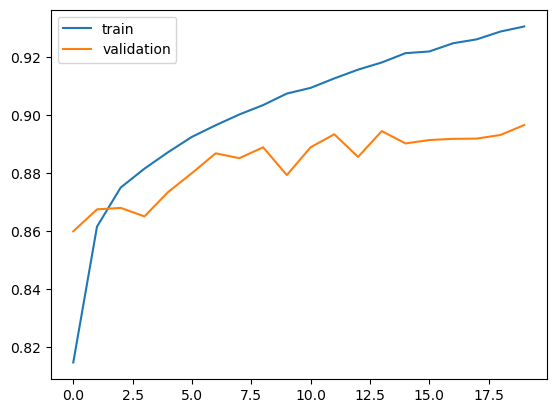

In [18]:
import matplotlib.pyplot as plt

# 훈련 결과 그래프로 확인
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

# 10번쯤 반복이 괜찮지 않을까...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[2.83732788e-06 6.45573872e-13 9.06017542e-01 2.30879547e-08
  8.26458186e-02 1.44290500e-11 1.13338465e-02 5.86734758e-11
  6.22067162e-08 9.59832214e-11]]


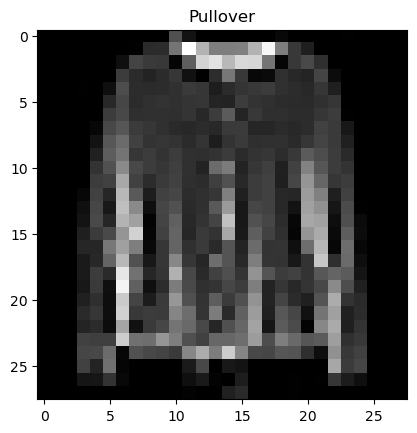

In [19]:
import matplotlib.pyplot as plt

# 예측할 이미지 뽑고
# 이미지를 보고 예측된 이름 가져오기

# 클래스 이름 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 예측
pred_prob = model.predict(np.expand_dims(test_images[25], axis=0))
print(pred_prob)

# 이미지 출력
plt.imshow(test_images[25], cmap='gray')
# 이미지의 예측된 이름 출력
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [20]:
# 평가
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8855 - loss: 0.3729


[0.38153281807899475, 0.8845999836921692]

### Functional API

In [21]:
class Test:
    def __call__(self, data):
        return data + 10

# 생성자 뒤에 괄호로 쓴다
# call 함수
print(Test()(20))

30


In [22]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

# 입력 데이터 크기 
INPUT_SIZE = 28

# 인공 신경망 생성 함수
def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [23]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 세트 불러오기
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

# 전처리 함수 선언
def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

# 원-핫 인코딩 변환 함수 선언
def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

# 데이터 세트 분리 함수
def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)


# 딥러닝은 무조건 모듈화해야 함!

In [24]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터 세트 불러오기
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

# 데이터 세트 분리 함수를 통해 데이터 세트 분리
# 케라스에서 지원하는 데이터에서만 사용가능한 모듈(케글 이런곳에서 들고온 거 안됨)
(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

# 형태 확인
print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [25]:
# 인공 신경망 생성 함수를 통해 인공 신경망 생성
model = create_model()
# 모델 구조 확인
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일 (변수에 저장 X)
model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [27]:
# 훈련
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.7390 - loss: 0.7658 - val_acc: 0.8424 - val_loss: 0.4364
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8503 - loss: 0.4148 - val_acc: 0.8592 - val_loss: 0.3791
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8660 - loss: 0.3678 - val_acc: 0.8668 - val_loss: 0.3610
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8783 - loss: 0.3317 - val_acc: 0.8733 - val_loss: 0.3352
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8845 - loss: 0.3108 - val_acc: 0.8597 - val_loss: 0.3625
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8895 - loss: 0.3018 - val_acc: 0.8714 - val_loss: 0.3443
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8955 - loss: 0.2818 - val_acc: 0.8779 - val_loss: 0.3308
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9015 - loss: 0.2652 - val_acc: 0.8788 - val_loss: 0.3310
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - ac

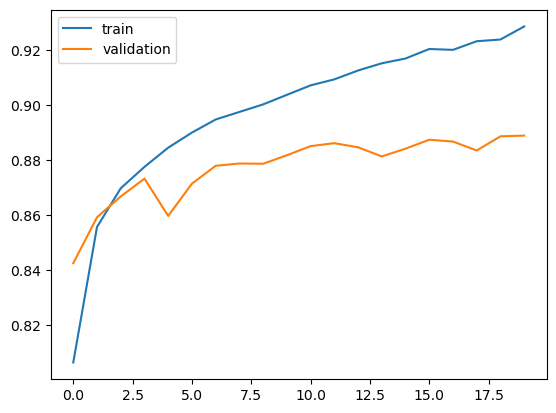

In [28]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화 하는 함수
def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [29]:
# 예측
pred_prob = model.predict(np.expand_dims(test_images[8500], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[1.3856778e-04 4.9441629e-10 9.9710649e-01 6.4971855e-09 4.3534685e-04
  2.7805255e-11 2.3195825e-03 3.4039276e-14 1.4717925e-09 3.4645986e-12]]


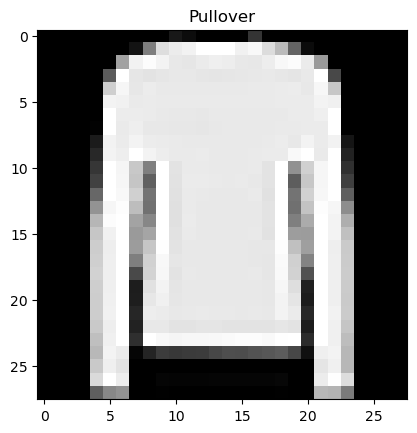

In [30]:
import matplotlib.pyplot as plt

# 클래스 이름 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 이미치 출력
plt.imshow(test_images[8500], cmap='gray')
# 이미지의 예측된 이름 출력
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()